## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.105395 -0.237451  1.083433 -1.455392  1.537498 -0.847310
1 -0.510298 -0.442287 -0.782728  0.845717 -1.022657 -0.158880
2 -0.946086  0.676353 -1.659641 -1.045568  1.075876  0.273501
3  1.425402 -0.825715  0.755909 -0.184583 -0.056858 -0.020909
4  1.715856  0.411739  0.355514  0.372494  1.463196  1.332818


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9638468	total: 58ms	remaining: 58s
1:	learn: 0.9553634	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9461268	total: 59ms	remaining: 19.6s
3:	learn: 0.9367588	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9285646	total: 60.1ms	remaining: 12s
5:	learn: 0.9197162	total: 60.8ms	remaining: 10.1s
6:	learn: 0.9100629	total: 61.4ms	remaining: 8.71s
7:	learn: 0.9026000	total: 62ms	remaining: 7.68s
8:	learn: 0.8951577	total: 62.7ms	remaining: 6.9s
9:	learn: 0.8868744	total: 63.1ms	remaining: 6.25s
10:	learn: 0.8785732	total: 63.7ms	remaining: 5.73s
11:	learn: 0.8696640	total: 64.1ms	remaining: 5.28s
12:	learn: 0.8611013	total: 64.7ms	remaining: 4.91s
13:	learn: 0.8528485	total: 65.2ms	remaining: 4.59s
14:	learn: 0.8478962	total: 65.6ms	remaining: 4.31s
15:	learn: 0.8403335	total: 66.2ms	remaining: 4.07s
16:	learn: 0.8326210	total: 66.7ms	remaining: 3.86s
17:	learn: 0.8260087	total: 67.2ms	remaining: 3.67s
18:	learn: 0.8194970	total: 67.8ms	remaining: 3.5s
19:	

102:	learn: 0.4159656	total: 109ms	remaining: 945ms
103:	learn: 0.4136584	total: 109ms	remaining: 938ms
104:	learn: 0.4110849	total: 109ms	remaining: 933ms
105:	learn: 0.4082573	total: 110ms	remaining: 926ms
106:	learn: 0.4056166	total: 110ms	remaining: 921ms
107:	learn: 0.4029972	total: 111ms	remaining: 915ms
108:	learn: 0.4008916	total: 111ms	remaining: 910ms
109:	learn: 0.3984969	total: 112ms	remaining: 905ms
110:	learn: 0.3955683	total: 112ms	remaining: 899ms
111:	learn: 0.3920763	total: 113ms	remaining: 894ms
112:	learn: 0.3894450	total: 113ms	remaining: 888ms
113:	learn: 0.3864438	total: 114ms	remaining: 884ms
114:	learn: 0.3840011	total: 114ms	remaining: 878ms
115:	learn: 0.3814417	total: 115ms	remaining: 874ms
116:	learn: 0.3782593	total: 115ms	remaining: 869ms
117:	learn: 0.3753047	total: 116ms	remaining: 865ms
118:	learn: 0.3725656	total: 116ms	remaining: 861ms
119:	learn: 0.3700686	total: 117ms	remaining: 856ms
120:	learn: 0.3675873	total: 117ms	remaining: 851ms
121:	learn: 

266:	learn: 0.1448474	total: 187ms	remaining: 513ms
267:	learn: 0.1440346	total: 188ms	remaining: 512ms
268:	learn: 0.1430888	total: 188ms	remaining: 511ms
269:	learn: 0.1422760	total: 189ms	remaining: 510ms
270:	learn: 0.1414900	total: 189ms	remaining: 509ms
271:	learn: 0.1407170	total: 190ms	remaining: 508ms
272:	learn: 0.1397953	total: 190ms	remaining: 506ms
273:	learn: 0.1388687	total: 191ms	remaining: 507ms
274:	learn: 0.1377290	total: 192ms	remaining: 505ms
275:	learn: 0.1369870	total: 192ms	remaining: 504ms
276:	learn: 0.1361356	total: 193ms	remaining: 503ms
277:	learn: 0.1351306	total: 193ms	remaining: 501ms
278:	learn: 0.1344131	total: 194ms	remaining: 500ms
279:	learn: 0.1336016	total: 194ms	remaining: 499ms
280:	learn: 0.1328595	total: 194ms	remaining: 498ms
281:	learn: 0.1320456	total: 195ms	remaining: 496ms
282:	learn: 0.1310652	total: 195ms	remaining: 495ms
283:	learn: 0.1301840	total: 196ms	remaining: 494ms
284:	learn: 0.1292465	total: 196ms	remaining: 493ms
285:	learn: 

480:	learn: 0.0514749	total: 291ms	remaining: 314ms
481:	learn: 0.0512059	total: 292ms	remaining: 314ms
482:	learn: 0.0511077	total: 293ms	remaining: 313ms
483:	learn: 0.0510109	total: 293ms	remaining: 312ms
484:	learn: 0.0507753	total: 293ms	remaining: 311ms
485:	learn: 0.0505156	total: 294ms	remaining: 311ms
486:	learn: 0.0504210	total: 294ms	remaining: 310ms
487:	learn: 0.0503278	total: 295ms	remaining: 309ms
488:	learn: 0.0499956	total: 295ms	remaining: 308ms
489:	learn: 0.0497232	total: 296ms	remaining: 308ms
490:	learn: 0.0496443	total: 296ms	remaining: 307ms
491:	learn: 0.0493790	total: 296ms	remaining: 306ms
492:	learn: 0.0491195	total: 297ms	remaining: 305ms
493:	learn: 0.0488761	total: 297ms	remaining: 305ms
494:	learn: 0.0488009	total: 298ms	remaining: 304ms
495:	learn: 0.0485136	total: 298ms	remaining: 303ms
496:	learn: 0.0484402	total: 299ms	remaining: 302ms
497:	learn: 0.0482028	total: 299ms	remaining: 301ms
498:	learn: 0.0478088	total: 299ms	remaining: 301ms
499:	learn: 

639:	learn: 0.0287070	total: 370ms	remaining: 208ms
640:	learn: 0.0286456	total: 370ms	remaining: 207ms
641:	learn: 0.0284953	total: 371ms	remaining: 207ms
642:	learn: 0.0283468	total: 371ms	remaining: 206ms
643:	learn: 0.0282059	total: 372ms	remaining: 205ms
644:	learn: 0.0280476	total: 372ms	remaining: 205ms
645:	learn: 0.0279634	total: 373ms	remaining: 204ms
646:	learn: 0.0279057	total: 373ms	remaining: 204ms
647:	learn: 0.0277546	total: 373ms	remaining: 203ms
648:	learn: 0.0276183	total: 374ms	remaining: 202ms
649:	learn: 0.0274665	total: 374ms	remaining: 202ms
650:	learn: 0.0273548	total: 375ms	remaining: 201ms
651:	learn: 0.0271851	total: 375ms	remaining: 200ms
652:	learn: 0.0270467	total: 376ms	remaining: 200ms
653:	learn: 0.0268820	total: 376ms	remaining: 199ms
654:	learn: 0.0267417	total: 376ms	remaining: 198ms
655:	learn: 0.0266435	total: 377ms	remaining: 198ms
656:	learn: 0.0265888	total: 377ms	remaining: 197ms
657:	learn: 0.0265347	total: 378ms	remaining: 196ms
658:	learn: 

858:	learn: 0.0126066	total: 475ms	remaining: 78ms
859:	learn: 0.0125673	total: 476ms	remaining: 77.4ms
860:	learn: 0.0125123	total: 476ms	remaining: 76.9ms
861:	learn: 0.0124794	total: 477ms	remaining: 76.3ms
862:	learn: 0.0124547	total: 477ms	remaining: 75.7ms
863:	learn: 0.0124007	total: 478ms	remaining: 75.2ms
864:	learn: 0.0123738	total: 478ms	remaining: 74.6ms
865:	learn: 0.0123097	total: 479ms	remaining: 74.1ms
866:	learn: 0.0122695	total: 480ms	remaining: 73.6ms
867:	learn: 0.0122443	total: 480ms	remaining: 73ms
868:	learn: 0.0122017	total: 481ms	remaining: 72.5ms
869:	learn: 0.0121755	total: 481ms	remaining: 71.9ms
870:	learn: 0.0121517	total: 482ms	remaining: 71.4ms
871:	learn: 0.0120997	total: 482ms	remaining: 70.8ms
872:	learn: 0.0120522	total: 482ms	remaining: 70.2ms
873:	learn: 0.0120134	total: 483ms	remaining: 69.6ms
874:	learn: 0.0119463	total: 484ms	remaining: 69.1ms
875:	learn: 0.0119154	total: 484ms	remaining: 68.5ms
876:	learn: 0.0118665	total: 485ms	remaining: 68ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

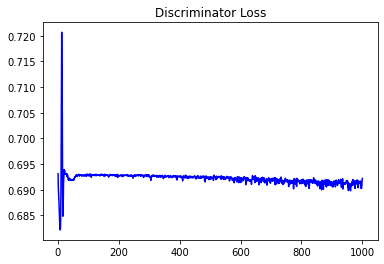

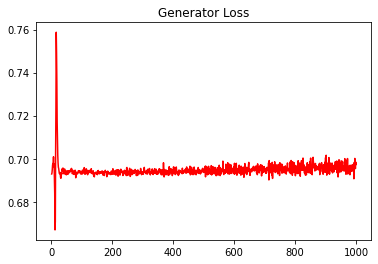

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1475576882354932


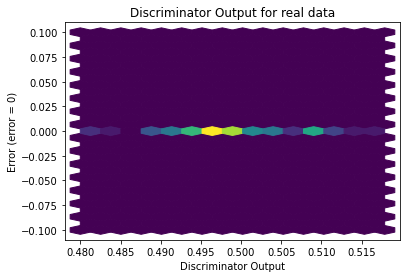

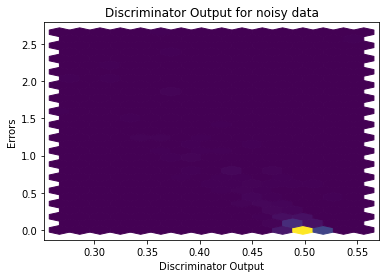

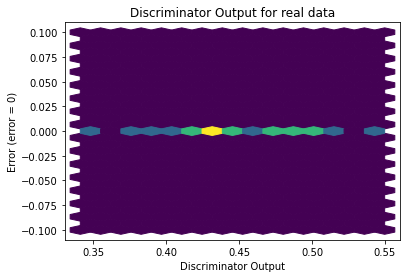

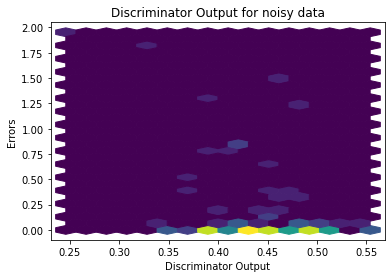

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


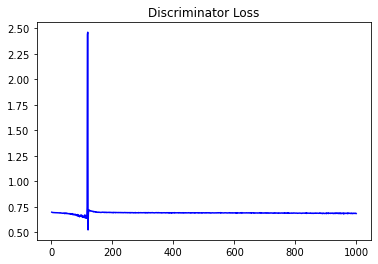

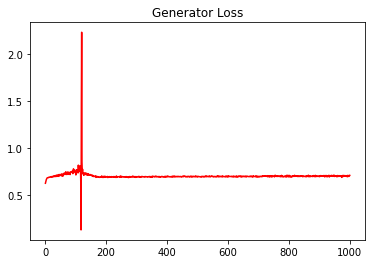

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.20003483235587421


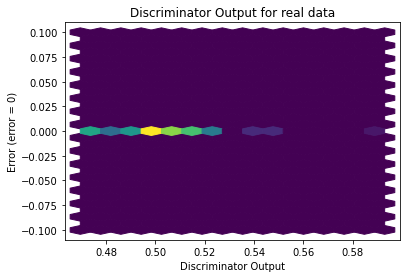

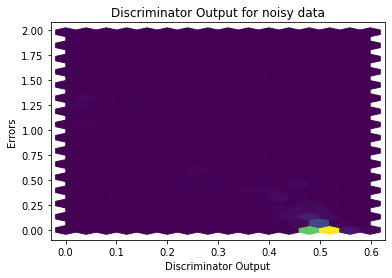

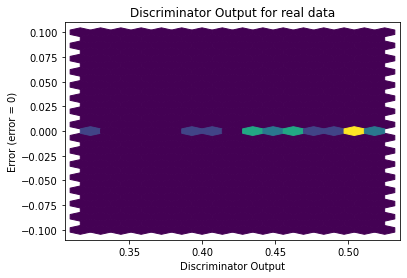

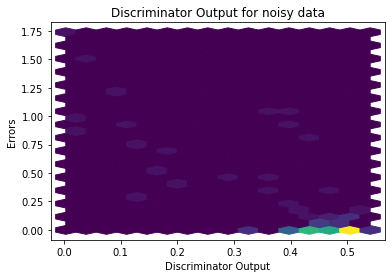

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0274]], requires_grad=True)
